In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [1]:
import networkx as nx

# Network X

## Create and Visualize simple unidirectional graph:

In [11]:
G = nx.Graph() # for a directed graph use nx.DiGraph()

# add nodes
G.add_node(1)
G.add_nodes_from(range(2,9))  # add multiple nodes at once

# add edges 
G.add_edge(1,2)
edges = [(2,3), (1,3), (4,1), (4,5), (5,6), (5,7), (6,7), (7,8), (6,8)]
G.add_edges_from(edges)

#Print infos
print(G.nodes())
print(nx.info(G))

[1, 2, 3, 4, 5, 6, 7, 8]
Graph with 8 nodes and 10 edges


## Useful functions:

### Plot Degree Distribution:

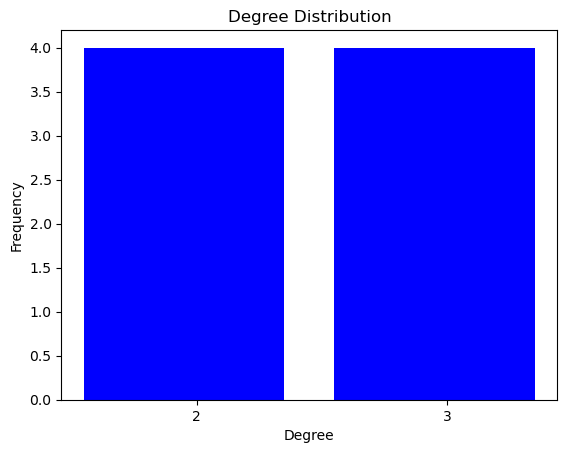

In [8]:
def plot_degree_distribution(G):
    degrees = {}
    for node in G.nodes():
        degree = G.degree(node)
        if degree not in degrees:
            degrees[degree] = 0
        degrees[degree] += 1
    sorted_degree = sorted(degrees.items())
    deg = [k for (k,v) in sorted_degree]
    cnt = [v for (k,v) in sorted_degree]
    fig, ax = plt.subplots()
    plt.bar(deg, cnt, width=0.80, color='b')
    plt.title("Degree Distribution")
    plt.ylabel("Frequency")
    plt.xlabel("Degree")
    ax.set_xticks([d+0.05 for d in deg])
    ax.set_xticklabels(deg)

plot_degree_distribution(G)

### Describe the Network:

In [3]:
# Helper function for printing various graph properties
def describe_graph(G):
    print(nx.info(G))
    if nx.is_connected(G):
        print("Avg. Shortest Path Length: %.4f" %nx.average_shortest_path_length(G))
        print("Diameter: %.4f" %nx.diameter(G)) # Longest shortest path
    else:
        print("Graph is not connected")
        print("Diameter and Avg shortest path length are not defined!")
    print("Sparsity: %.4f" %nx.density(G))  # #edges/#edges-complete-graph
    # #closed-triplets(3*#triangles)/#all-triplets
    print("Global clustering coefficient aka Transitivity: %.4f" %nx.transitivity(G))

describe_graph(G)

Graph with 8 nodes and 10 edges
Avg. Shortest Path Length: 2.3929
Diameter: 5.0000
Sparsity: 0.3571
Global clustering coefficient aka Transitivity: 0.5625


C:\Users\flori\AppData\Local\Temp\ipykernel_4756\3380150415.py:3: DeprecationWarning: info is deprecated and will be removed in version 3.0.

  print(nx.info(G))


### Visualize the Graph:

#### Code from class:

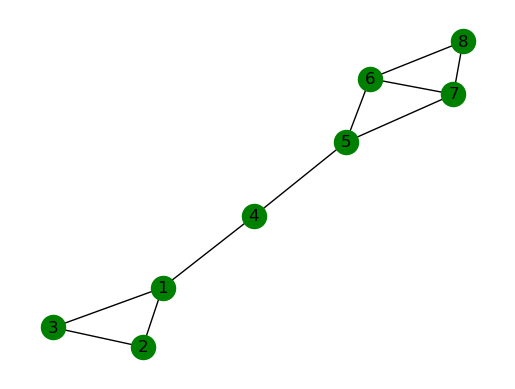

In [6]:
# Helper function for visualizing the graph
def visualize_graph(G, with_labels=True, k=None, alpha=1.0, node_shape='o'):
    #nx.draw_spring(G, with_labels=with_labels, alpha = alpha)
    pos = nx.spring_layout(G, k=k)
    if with_labels:
        lab = nx.draw_networkx_labels(G, pos, labels=dict([(n, n) for n in G.nodes()]))
    ec = nx.draw_networkx_edges(G, pos, alpha=alpha)
    nc = nx.draw_networkx_nodes(G, pos, nodelist=G.nodes(), node_color='g', node_shape=node_shape)
    plt.axis('off')

visualize_graph(G)
'''Other usages:
visualize_graph(G, False, k=0.05, alpha=0.4)                    No annotations + no lines
visualize_graph(G, False, k=0.2, alpha=0.4, node_shape='.')     With line and smaller nodes.
'''

#### draw spring:

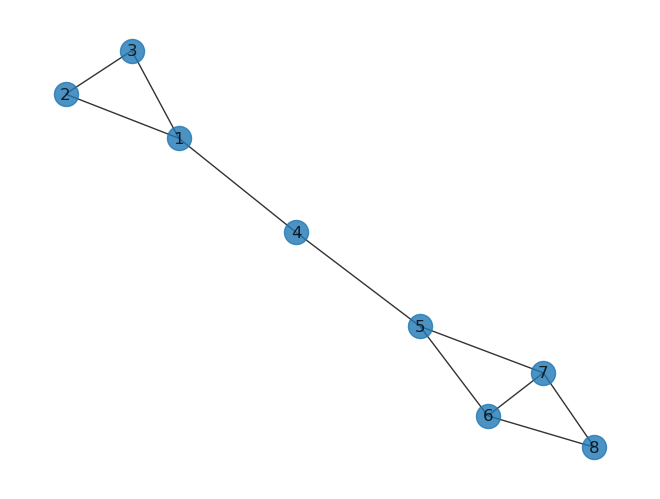

In [12]:
nx.draw_spring(G, with_labels=True,  alpha = 0.8)

#### draw circular:

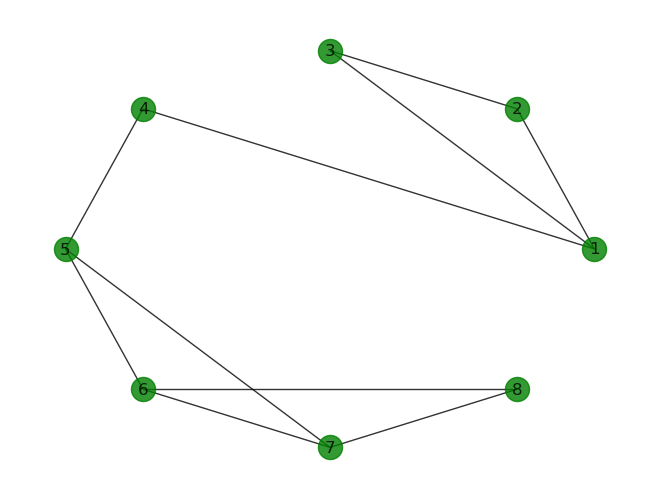

In [14]:
nx.draw_circular(G, with_labels=True,  node_color='g', alpha = 0.8)

## Plot different kinds of graphs:

### Erdos-Renyi graph:

Graph with 10 nodes and 20 edges
Avg. Shortest Path Length: 1.6444
Diameter: 3.0000
Sparsity: 0.4444
Global clustering coefficient aka Transitivity: 0.3582


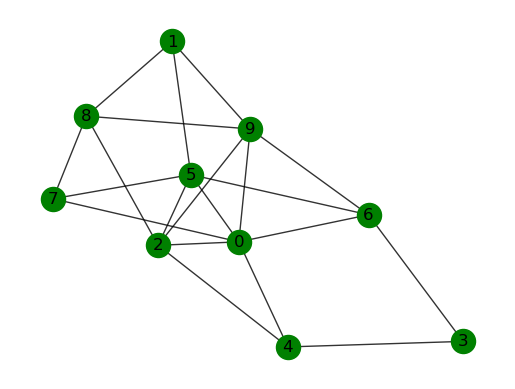

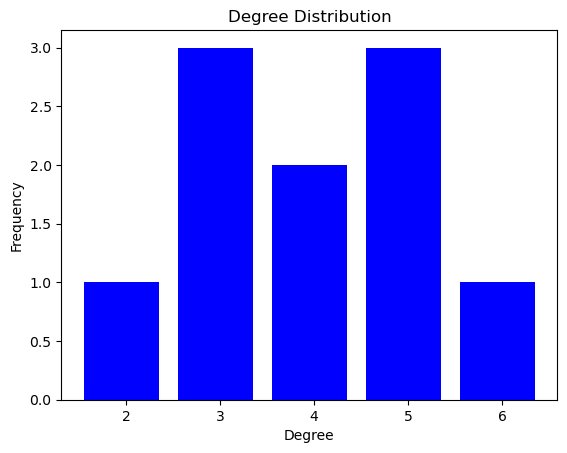

In [9]:
n = 10  # 10 nodes
m = 20  # 20 edges

erG = nx.gnm_random_graph(n, m)

describe_graph(erG)
visualize_graph(erG, k=0.05, alpha=0.8)
plot_degree_distribution(erG)

### Zachary Karate Club Network:

Graph named "Zachary's Karate Club" with 34 nodes and 78 edges
Avg. Shortest Path Length: 2.4082
Diameter: 5.0000
Sparsity: 0.1390
Global clustering coefficient aka Transitivity: 0.2557


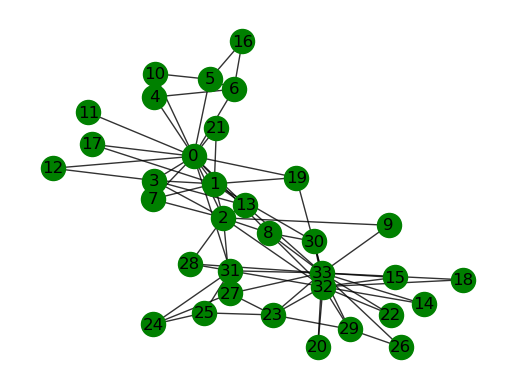

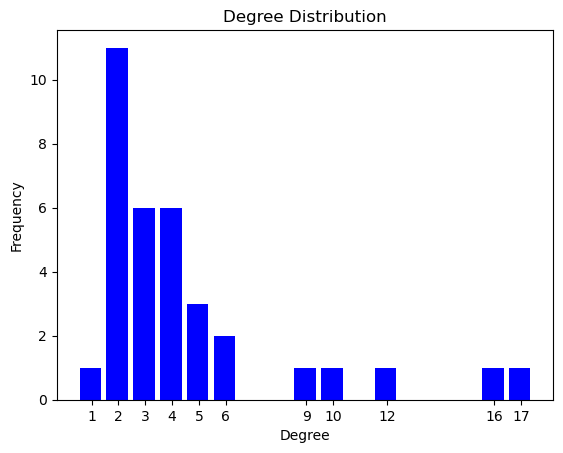

In [10]:
karateG = nx.karate_club_graph()
describe_graph(karateG)
visualize_graph(karateG, k=0.05, alpha=0.8)
plot_degree_distribution(karateG)

## Create your own networks from dataframes:

### Create Network:

In [ ]:
%%skip
exampleG =nx.from_pandas_edgelist(df_edges, 'Source', 'Target', edge_attr=None, create_using= nx.Graph())
describe_graph(exampleG)

# Where df contains a columns "Source" and another one "Target".

### Add node attributes:

In [ ]:
%%skip
nx.set_node_attributes(exampleG, df_nodes['Role'].to_dict(), 'Role' )
nx.set_node_attributes(exampleG, df_nodes['Gender'].to_dict(), 'Gender' )
nx.set_node_attributes(exampleG, df_nodes['Birthdate'].to_dict(), 'Birthdate' )

### Look at a node:

In [15]:
%%skip
source_name = df_sources.iloc[4]['Source']
exampleG.nodes[sorce_name]

UsageError: Cell magic `%%skip` not found.


## Sparsity:

Sparsity is described by the formula: <br>
$$ L = {|E| \over{|E_max|}}$$
Where E is the number of missing edges and $E_max$ is the total possible number of edges.